In [20]:
from CSR import *
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [21]:
def plot_2D_contour(x, y, z):
    
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    norm = colors.TwoSlopeNorm( vcenter=0)
    surf = ax.imshow(z, extent=(min(x), max(x), min(y), max(y)), origin='lower',  cmap='seismic',aspect='auto', norm = norm)
    
    fig.colorbar(surf, shrink=0.5, aspect=5)
    

    #fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.xlabel('x ($ \mu m$)')
    plt.ylabel('z ($ m$)')
    return ax

In [53]:
DtestCSR = CSR2D(input_file= 'input/dipole_config.yaml')
DtestCSR.CSR_params.compute_CSR = 0
DtestCSR.run(stop_time  =1.6)

Finish step 2 in 0.27187180519104004 seconds
Finish step 3 in 0.31621527671813965 seconds
Finish step 4 in 0.2829909324645996 seconds
Finish step 5 in 0.2753760814666748 seconds
Finish step 6 in 0.29167914390563965 seconds
Finish step 7 in 0.31757140159606934 seconds
Finish step 8 in 0.2925529479980469 seconds
Finish step 9 in 0.29489946365356445 seconds
Finish step 10 in 0.3479952812194824 seconds
Finish step 11 in 0.3103973865509033 seconds
Finish step 12 in 0.307525634765625 seconds
Finish step 13 in 0.3104712963104248 seconds
Finish step 14 in 0.302020788192749 seconds
Finish step 15 in 0.3151569366455078 seconds
Finish step 16 in 0.3336470127105713 seconds
Finish step 17 in 0.3162117004394531 seconds
Finish step 18 in 0.3329813480377197 seconds
Finish step 19 in 0.3333704471588135 seconds
Finish step 20 in 0.35401153564453125 seconds
Finish step 21 in 0.31150126457214355 seconds
Finish step 22 in 0.34798693656921387 seconds
Finish step 23 in 0.31608128547668457 seconds
Finish step

In [54]:
t = DtestCSR.beam.position
print(t)
s  = t -3*DtestCSR.beam.sigma_z
x = (s-t)*DtestCSR.beam.slope[0]


1.6000000000000008


In [55]:
xp, sp, CSR_integrand_z, CSR_integrand_x = DtestCSR.get_CSR_wake(s, x, debug = True)

In [56]:
CSR_integrand_x.shape

(100, 100)

<Axes: xlabel='x ($ \\mu m$)', ylabel='z ($ m$)'>

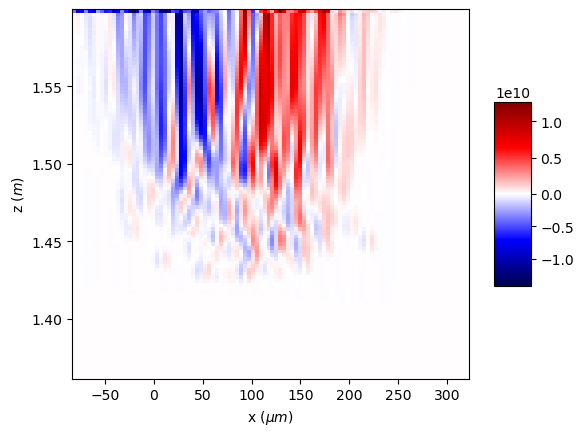

In [57]:
plot_2D_contour(x = xp*1e6, y = (sp), z = CSR_integrand_z.T)

## plot near singularity

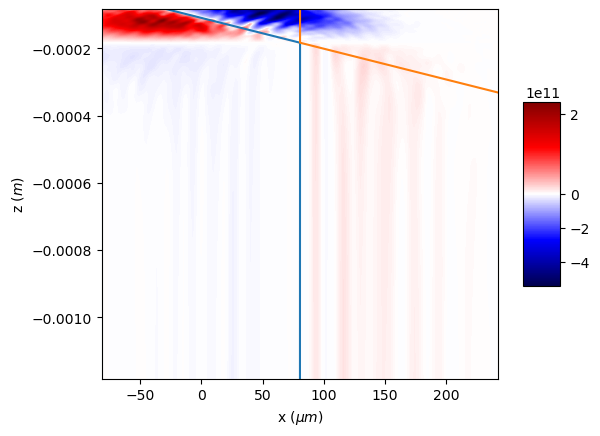

In [58]:
sp = np.linspace(s- 0.001, s + 0.0001, 1000)
sigx = DtestCSR.beam.sigma_x
xL = x -3*sigx
xR = x + 3*sigx
xp = np.linspace(xL, xR, 1000)
[xp_mesh, sp_mesh] = np.meshgrid(xp, sp, indexing='ij')




xp1, xp2 = DtestCSR.get_localization(x = x, s = s, t = t, sp = sp)


sp1 = sp[(xp1<=xR)&(xL<=xp1)]
xp1 = xp1[(xp1<=xR)&(xL<=xp1)]

sp2 = sp[(xp2<=xR)&(xL<=xp2)]
xp2 = xp2[(xp2<=xR)&(xL<=xp2)]
CSR_integrand_z, CSR_integrand_x = DtestCSR.get_CSR_integrand(s = s, t = t, x = x, xp = xp_mesh, sp = sp_mesh)
ax = plot_2D_contour(x = xp*1e6, y = (sp-t), z = CSR_integrand_z.T)
ax.plot(xp1*1e6, (sp1 - t))
ax.plot(xp2*1e6, (sp2 - t))

## plot who range

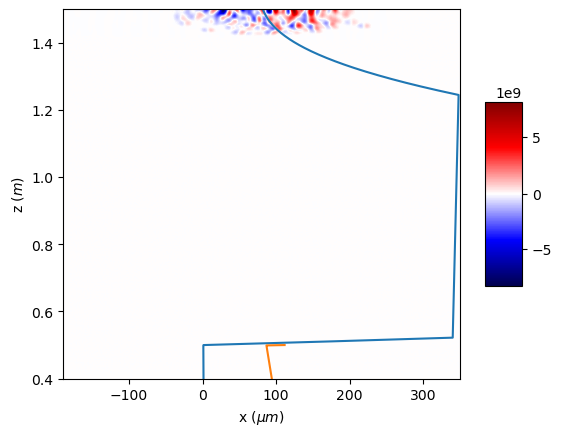

In [59]:
sp = np.linspace(s-1.2, s -0.1, 1000)
sigx = DtestCSR.beam.sigma_x
xL = x -5*sigx
xR = x + 5*sigx
xp = np.linspace(xL, xR, 1000)
[xp_mesh, sp_mesh] = np.meshgrid(xp, sp, indexing='ij')

xp1, xp2 = DtestCSR.get_localization(x = x, s = s, t = t, sp = sp)


sp1 = sp[(xp1<=xR)&(xL<=xp1)]
xp1 = xp1[(xp1<=xR)&(xL<=xp1)]

sp2 = sp[(xp2<=xR)&(xL<=xp2)]
xp2 = xp2[(xp2<=xR)&(xL<=xp2)]
CSR_integrand_z, CSR_integrand_x = DtestCSR.get_CSR_integrand(s = s, t = t, x = x, xp = xp_mesh, sp = sp_mesh)
ax = plot_2D_contour(x = xp*1e6, y = (sp), z = CSR_integrand_z.T)
ax.plot(xp1*1e6, (sp1 ))
ax.plot(xp2*1e6, (sp2 ))

## Plot area 1

In [60]:
DtestCSR.formation_length

0.23811015779522998

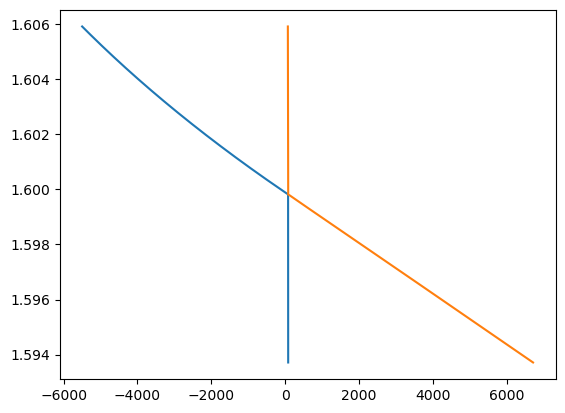

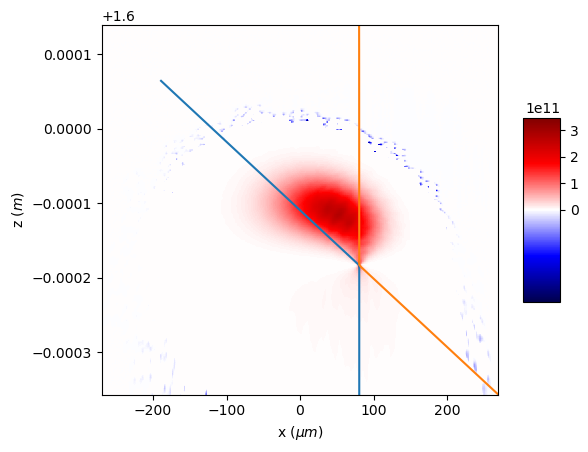

In [61]:


tan_a = DtestCSR.beam.slope[0]
tan_theta = -2*tan_a/(1-tan_a**2)
dz = np.abs(10*DtestCSR.beam.sigma_x/tan_theta)

sp = np.linspace(np.max((s - 100*DtestCSR.beam.sigma_z, 0)), s + 100*DtestCSR.beam.sigma_z , 100000)
xp1, xp2 = DtestCSR.get_localization(x = x, s = s, t = t, sp = sp)
ind  = (np.abs(xp1) < 5*DtestCSR.beam.sigma_x) &(np.abs(xp2) < 5*DtestCSR.beam.sigma_x)
plt.figure()
plt.plot(xp1*1e6, sp)
plt.plot(xp2*1e6, sp)

if sum(ind) == len(xp1):   # The two region are parallel and not tilted
    xmin = x - 5*DtestCSR.beam.sigma_x
    xmax = x + 5*DtestCSR.beam.sigma_x
    smin = s - 5*DtestCSR.beam.sigma_z
    smax = s + 5*DtestCSR.beam.sigma_z

else:
    xp1_valid = xp1[ind]
    xp2_valid = xp2[ind]
    sp_valid = sp[ind]
    smin = np.min(sp_valid)
    smax = np.max(sp_valid)
    xmin = np.min((np.min(xp1_valid), np.min(xp2_valid)))
    xmax = np.max((np.max(xp1_valid), np.max(xp2_valid)))


sp = np.linspace(smin, smax, 200)
xp = np.linspace(xmin, xmax, 200)
[xp_mesh, sp_mesh] = np.meshgrid(xp, sp, indexing='ij')

xp1, xp2 = DtestCSR.get_localization(x = x, s = s, t = t, sp = sp)

sp1 = sp[(xp1<=xR)&(xL<=xp1)]
xp1 = xp1[(xp1<=xR)&(xL<=xp1)]

sp2 = sp[(xp2<=xR)&(xL<=xp2)]
xp2 = xp2[(xp2<=xR)&(xL<=xp2)]
CSR_integrand_z, CSR_integrand_x = DtestCSR.get_CSR_integrand(s = s, t = t, x = x, xp = xp_mesh, sp = sp_mesh)
ax = plot_2D_contour(x = xp*1e6, y = (sp), z = CSR_integrand_x.T)
ax.plot(xp1*1e6, sp1 )
ax.plot(xp2*1e6, sp2 )

## Plot area 2

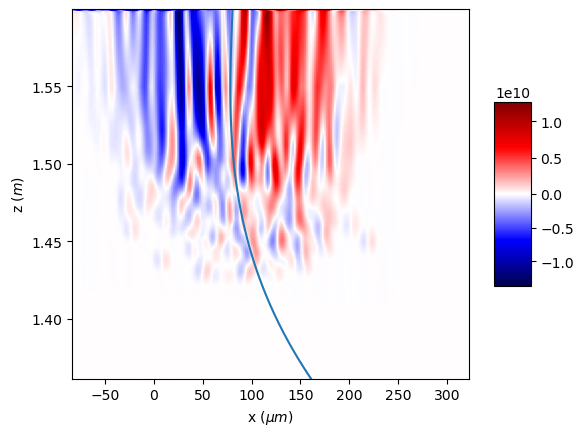

In [62]:

sp = np.linspace(np.max((smin - DtestCSR.formation_length, 0)), smin, 200)
xp1, xp2 = DtestCSR.get_localization(x = x, s = s, t = t, sp = sp)

xL = np.min(xp1) - 3*DtestCSR.beam.sigma_x
xR = np.max(xp1) + 3*DtestCSR.beam.sigma_x




xp = np.linspace(xL  , xR, 200)
[xp_mesh, sp_mesh] = np.meshgrid(xp, sp, indexing='ij')



sp1 = sp[(xp1<=xR)&(xL<=xp1)]
xp1 = xp1[(xp1<=xR)&(xL<=xp1)]

sp2 = sp[(xp2<=xR)&(xL<=xp2)]
xp2 = xp2[(xp2<=xR)&(xL<=xp2)]
CSR_integrand_z, CSR_integrand_x = DtestCSR.get_CSR_integrand(s = s, t = t, x = x, xp = xp_mesh, sp = sp_mesh)
ax = plot_2D_contour(x = xp*1e6, y = sp, z = CSR_integrand_z.T)
ax.plot(xp1*1e6, sp1 )

## Plot area 1 method 2

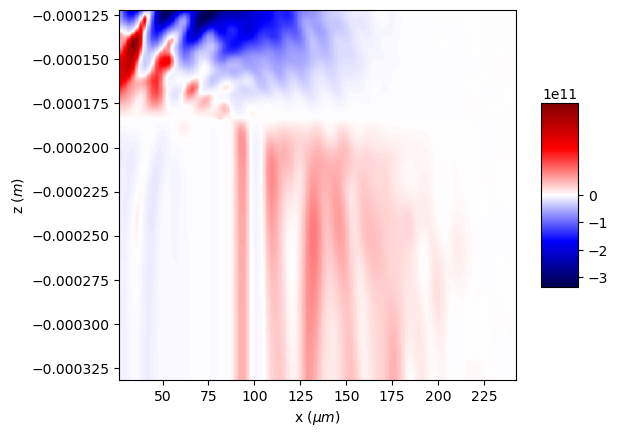

In [63]:
tan_a = DtestCSR.beam.slope[0]
tan_theta = -2*tan_a/(1-tan_a**2)
dz = 3*DtestCSR.beam.sigma_x/np.abs(tan_theta)
x1 = x + dz*tan_theta
if tan_theta > 0:
    x2 = x - DtestCSR.beam.sigma_x
    xmin, xmax = x2, x1
else:
    x2 = x + DtestCSR.beam.sigma_x
    xmin, xmax = x1, x2

s1 = s -dz

s2 = s + DtestCSR.beam.sigma_z




    



sp = np.linspace(s1, s2, 200)
xp = np.linspace(xmin, xmax, 100)
[xp_mesh, sp_mesh] = np.meshgrid(xp, sp, indexing='ij')

#xp1, xp2 = DtestCSR.get_localization(x = x, s = s, t = t, sp = sp)

#sp1 = sp[(xp1<=xR)&(xL<=xp1)]
#xp1 = xp1[(xp1<=xR)&(xL<=xp1)]

#sp2 = sp[(xp2<=xR)&(xL<=xp2)]
#xp2 = xp2[(xp2<=xR)&(xL<=xp2)]
CSR_integrand_z, CSR_integrand_x = DtestCSR.get_CSR_integrand(s = s, t = t, x = x, xp = xp_mesh, sp = sp_mesh)
ax = plot_2D_contour(x = xp*1e6, y = (sp-t), z = CSR_integrand_z.T)
#ax.plot(xp1*1e6, (sp1 - t))
#ax.plot(xp2*1e6, (sp2 - t))